# Random Forests in trading 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
pal = yf.download('PA=F', start = '2020-03-23', end = '2024-10-11')
aapl = yf.download('AAPL', start = '2020-03-23', end = '2024-10-11')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
pal

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-23,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,0
2020-03-24,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,0
2020-03-25,2277.699951,2277.699951,2277.699951,2277.699951,2277.699951,0
2020-03-26,2256.199951,2256.199951,2256.199951,2256.199951,2256.199951,0
2020-03-27,2226.899902,2226.899902,2226.800049,2226.800049,2226.800049,0
...,...,...,...,...,...,...
2024-10-04,995.200012,995.200012,995.200012,995.200012,995.200012,0
2024-10-07,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,0
2024-10-08,1003.599976,1003.599976,1003.599976,1003.599976,1003.599976,0


In [4]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-23,57.020000,57.125000,53.152500,56.092499,54.569721,336752800
2020-03-24,59.090000,61.922501,58.575001,61.720001,60.044460,287531200
2020-03-25,62.687500,64.562500,61.075001,61.380001,59.713688,303602000
2020-03-26,61.630001,64.669998,61.590000,64.610001,62.855999,252087200
2020-03-27,63.187500,63.967499,61.762501,61.935001,60.253616,204216800
...,...,...,...,...,...,...
2024-10-04,227.899994,228.000000,224.130005,226.800003,226.800003,37245100
2024-10-07,224.500000,225.690002,221.330002,221.690002,221.690002,39505400
2024-10-08,224.300003,225.979996,223.250000,225.770004,225.770004,31855700


In [5]:
pal['Adj Close'] > pal['Adj Close'].shift()

Date
2020-03-23    False
2020-03-24     True
2020-03-25     True
2020-03-26    False
2020-03-27    False
              ...  
2024-10-04    False
2024-10-07     True
2024-10-08    False
2024-10-09     True
2024-10-10     True
Name: Adj Close, Length: 1147, dtype: bool

In [6]:
pal['Adj Close'].shift(-1)

Date
2020-03-23    1817.000000
2020-03-24    2277.699951
2020-03-25    2256.199951
2020-03-26    2226.800049
2020-03-27    2226.100098
                 ...     
2024-10-04    1023.000000
2024-10-07    1003.599976
2024-10-08    1036.900024
2024-10-09    1065.400024
2024-10-10            NaN
Name: Adj Close, Length: 1147, dtype: float64

In [7]:
pal['Increase'] = np.where(pal['Adj Close'] < pal['Adj Close'].shift(-1), 1, 0)

In [8]:
pal

,Open,High,Low,Close,Adj Close,Volume,Increase
Date,,,,,,,
2020-03-23,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,0,1
2020-03-24,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,0,1
2020-03-25,2277.699951,2277.699951,2277.699951,2277.699951,2277.699951,0,0
2020-03-26,2256.199951,2256.199951,2256.199951,2256.199951,2256.199951,0,0
2020-03-27,2226.899902,2226.899902,2226.800049,2226.800049,2226.800049,0,0
...,...,...,...,...,...,...,...
2024-10-04,995.200012,995.200012,995.200012,995.200012,995.200012,0,1
2024-10-07,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,0,0
2024-10-08,1003.599976,1003.599976,1003.599976,1003.599976,1003.599976,0,1


In [9]:
for col in pal.columns:
    pal.rename(columns={col: 'Palladium' + str(col)}, inplace=True)

In [10]:
pal

,PalladiumOpen,PalladiumHigh,PalladiumLow,PalladiumClose,PalladiumAdj Close,PalladiumVolume,PalladiumIncrease
Date,,,,,,,
2020-03-23,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,0,1
2020-03-24,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,0,1
2020-03-25,2277.699951,2277.699951,2277.699951,2277.699951,2277.699951,0,0
2020-03-26,2256.199951,2256.199951,2256.199951,2256.199951,2256.199951,0,0
2020-03-27,2226.899902,2226.899902,2226.800049,2226.800049,2226.800049,0,0
...,...,...,...,...,...,...,...
2024-10-04,995.200012,995.200012,995.200012,995.200012,995.200012,0,1
2024-10-07,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,0,0
2024-10-08,1003.599976,1003.599976,1003.599976,1003.599976,1003.599976,0,1


In [11]:
aapl['Increase'] = np.where(aapl['Adj Close'] < aapl['Adj Close'].shift(-1), 1, 0)

In [12]:
for col in aapl.columns:
    aapl.rename(columns={col: 'Apple' + str(col)}, inplace=True)

In [13]:
aapl

,AppleOpen,AppleHigh,AppleLow,AppleClose,AppleAdj Close,AppleVolume,AppleIncrease
Date,,,,,,,
2020-03-23,57.020000,57.125000,53.152500,56.092499,54.569721,336752800,1
2020-03-24,59.090000,61.922501,58.575001,61.720001,60.044460,287531200,0
2020-03-25,62.687500,64.562500,61.075001,61.380001,59.713688,303602000,1
2020-03-26,61.630001,64.669998,61.590000,64.610001,62.855999,252087200,0
2020-03-27,63.187500,63.967499,61.762501,61.935001,60.253616,204216800,1
...,...,...,...,...,...,...,...
2024-10-04,227.899994,228.000000,224.130005,226.800003,226.800003,37245100,0
2024-10-07,224.500000,225.690002,221.330002,221.690002,221.690002,39505400,1
2024-10-08,224.300003,225.979996,223.250000,225.770004,225.770004,31855700,1


## Combine 2 dataframes

In [14]:
df = pd.concat([aapl, pal], axis = 1)
df

,AppleOpen,AppleHigh,AppleLow,AppleClose,AppleAdj Close,AppleVolume,AppleIncrease,PalladiumOpen,PalladiumHigh,PalladiumLow,PalladiumClose,PalladiumAdj Close,PalladiumVolume,PalladiumIncrease
Date,,,,,,,,,,,,,,
2020-03-23,57.020000,57.125000,53.152500,56.092499,54.569721,336752800,1,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,0,1
2020-03-24,59.090000,61.922501,58.575001,61.720001,60.044460,287531200,0,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,0,1
2020-03-25,62.687500,64.562500,61.075001,61.380001,59.713688,303602000,1,2277.699951,2277.699951,2277.699951,2277.699951,2277.699951,0,0
2020-03-26,61.630001,64.669998,61.590000,64.610001,62.855999,252087200,0,2256.199951,2256.199951,2256.199951,2256.199951,2256.199951,0,0
2020-03-27,63.187500,63.967499,61.762501,61.935001,60.253616,204216800,1,2226.899902,2226.899902,2226.800049,2226.800049,2226.800049,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04,227.899994,228.000000,224.130005,226.800003,226.800003,37245100,0,995.200012,995.200012,995.200012,995.200012,995.200012,0,1
2024-10-07,224.500000,225.690002,221.330002,221.690002,221.690002,39505400,1,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,0,0
2024-10-08,224.300003,225.979996,223.250000,225.770004,225.770004,31855700,1,1003.599976,1003.599976,1003.599976,1003.599976,1003.599976,0,1


<Axes: title={'center': 'Correlation Matrix'}>

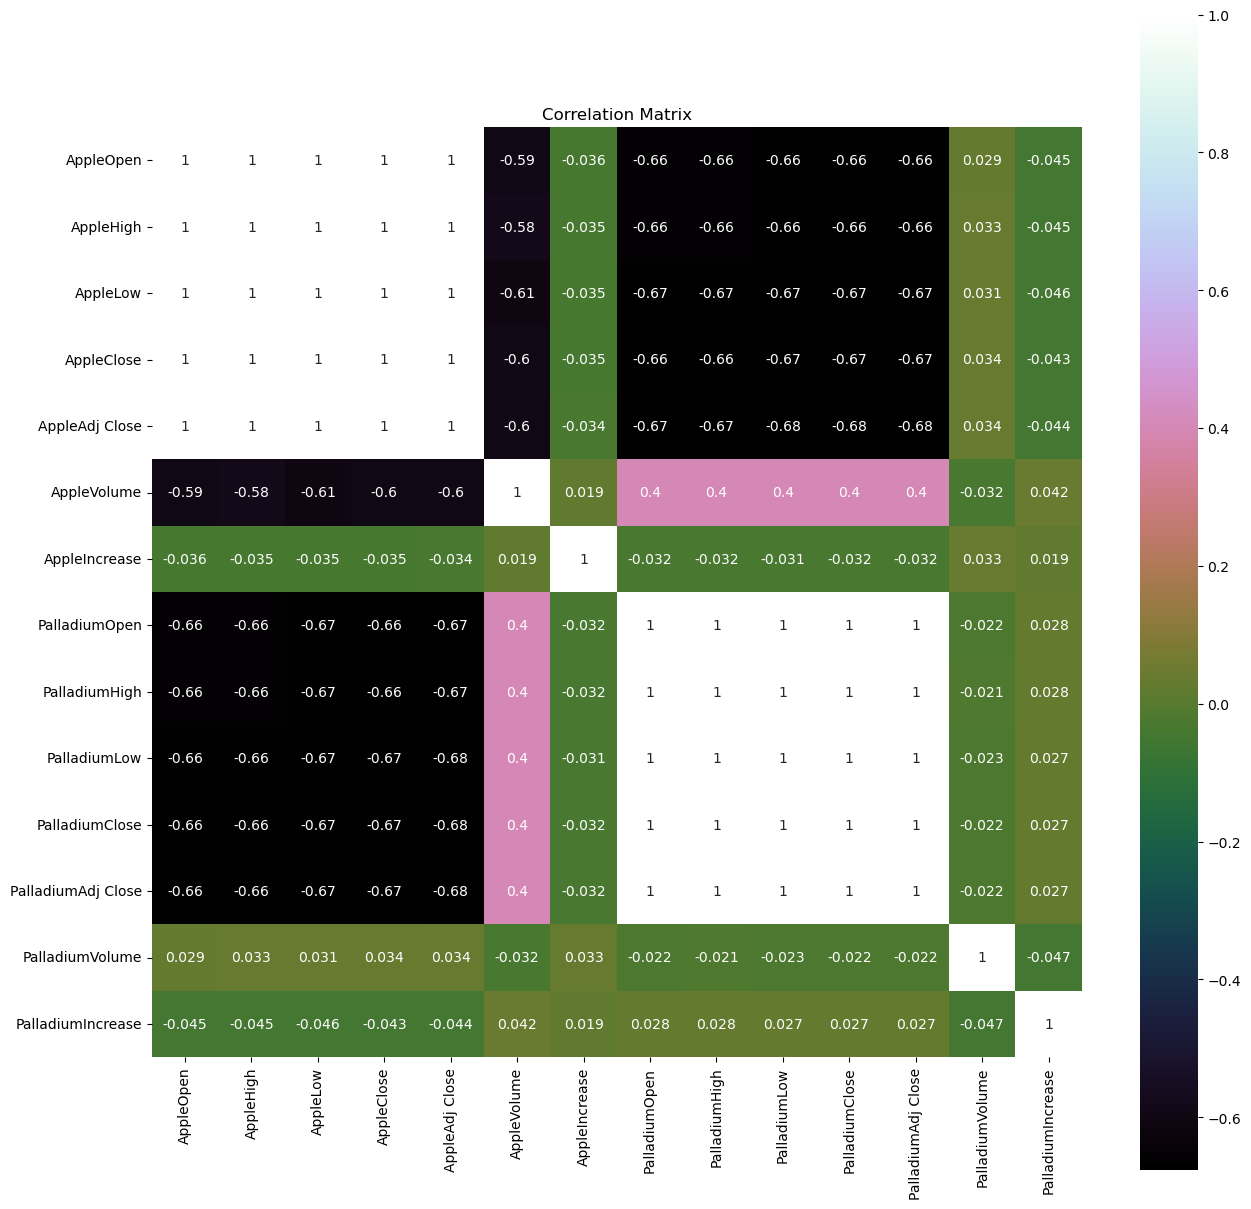

In [15]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [16]:
tree = DecisionTreeClassifier(
    #max_depth = 10, 
    min_samples_leaf = 5, # minimum number of samples in each leaf, to prevent overfitting
    random_state= 216)

rf = RandomForestClassifier(
    n_estimators = 500, # number of trees in ensemble
    #max_depth = 10, # max_depth of each tree
    min_samples_leaf = 5, 
    max_features = 2, # default is round(sqrt(num_features)), which in this case is 1.
    bootstrap= True, # sampling with replacement
    max_samples = 500, # number of training samples selected with replacement to build tree
    random_state = 216 # for consistency
    )

In [17]:
## Fit the models
#tree.fit(gold[['GoldOpen', 'GoldHigh', 'GoldLow', 'GoldClose','GoldAdj Close', 'GoldVolume']], gold['GoldIncrease'])

## rf and et may take slightly longer because we are fitting many trees
#rf.fit(gold[['GoldOpen', 'GoldHigh', 'GoldLow', 'GoldClose','GoldAdj Close', 'GoldVolume']], gold['GoldIncrease'])

## Splitting train and test set

In [18]:
# split out validation dataset for the end
subset_dataset = pal
Y = pal['PalladiumIncrease']
X = pal.loc[:, pal.columns != 'PalladiumIncrease']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [19]:
## Fit the models
tree.fit(X_train, Y_train)
print(accuracy_score(Y_test, tree.predict(X_test)))

## rf and et may take slightly longer because we are fitting many trees
rf.fit(X_train, Y_train)
print(accuracy_score(Y_test, rf.predict(X_test)))

0.49130434782608695
0.5043478260869565


## Use both Palladium and Apple

In [20]:
Y = df['PalladiumIncrease']
X = df.loc[:, df.columns != 'PalladiumIncrease']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1147 entries, 2020-03-23 to 2024-10-10
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AppleOpen           1147 non-null   float64
 1   AppleHigh           1147 non-null   float64
 2   AppleLow            1147 non-null   float64
 3   AppleClose          1147 non-null   float64
 4   AppleAdj Close      1147 non-null   float64
 5   AppleVolume         1147 non-null   int64  
 6   AppleIncrease       1147 non-null   int64  
 7   PalladiumOpen       1147 non-null   float64
 8   PalladiumHigh       1147 non-null   float64
 9   PalladiumLow        1147 non-null   float64
 10  PalladiumClose      1147 non-null   float64
 11  PalladiumAdj Close  1147 non-null   float64
 12  PalladiumVolume     1147 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 125.5 KB


In [22]:
Y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1147 entries, 2020-03-23 to 2024-10-10
Series name: PalladiumIncrease
Non-Null Count  Dtype
--------------  -----
1147 non-null   int64
dtypes: int64(1)
memory usage: 17.9 KB


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

## Fit the models
tree.fit(X_train, Y_train)
print(accuracy_score(Y_test, tree.predict(X_test)))

## rf and et may take slightly longer because we are fitting many trees
rf.fit(X_train, Y_train)
print(accuracy_score(Y_test, rf.predict(X_test)))

0.5304347826086957
0.5826086956521739


 ## Import different equity and commodity

In [24]:
tsla = yf.download('TSLA', start = '2020-03-23', end = '2024-10-11')
oil = yf.download('CL=F', start = '2020-03-23', end = '2024-10-11')
ford = yf.download('F', start = '2020-03-23', end = '2024-10-11')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-23,28.906668,29.466667,27.366667,28.952667,28.952667,246817500
2020-03-24,31.820000,34.245998,31.600000,33.666668,33.666668,343428000
2020-03-25,36.349998,37.133331,34.074001,35.950001,35.950001,318340500
2020-03-26,36.492668,37.333332,34.150002,35.210667,35.210667,260710500
2020-03-27,33.666668,35.053333,32.935333,34.290668,34.290668,215661000
...,...,...,...,...,...,...
2024-10-04,246.690002,250.960007,244.580002,250.080002,250.080002,86573200
2024-10-07,249.000000,249.830002,240.699997,240.830002,240.830002,68113300
2024-10-08,243.559998,246.210007,240.559998,244.500000,244.500000,56303200


In [26]:
tsla['Increase'] = np.where(tsla['Adj Close'] < tsla['Adj Close'].shift(-1), 1, 0)
oil['Increase'] = np.where(oil['Adj Close'] < oil['Adj Close'].shift(-1), 1, 0)
ford['Increase'] = np.where(ford['Adj Close'] < ford['Adj Close'].shift(-1), 1, 0)

In [27]:
for col in tsla.columns:
    tsla.rename(columns={col: 'Tesla' + str(col)}, inplace=True)

for col in oil.columns:
    oil.rename(columns={col: 'Oil' + str(col)}, inplace=True)

for col in ford.columns:
    ford.rename(columns={col: 'Ford' + str(col)}, inplace=True)

<Axes: title={'center': 'Correlation Matrix Tesla vs Palladium'}>

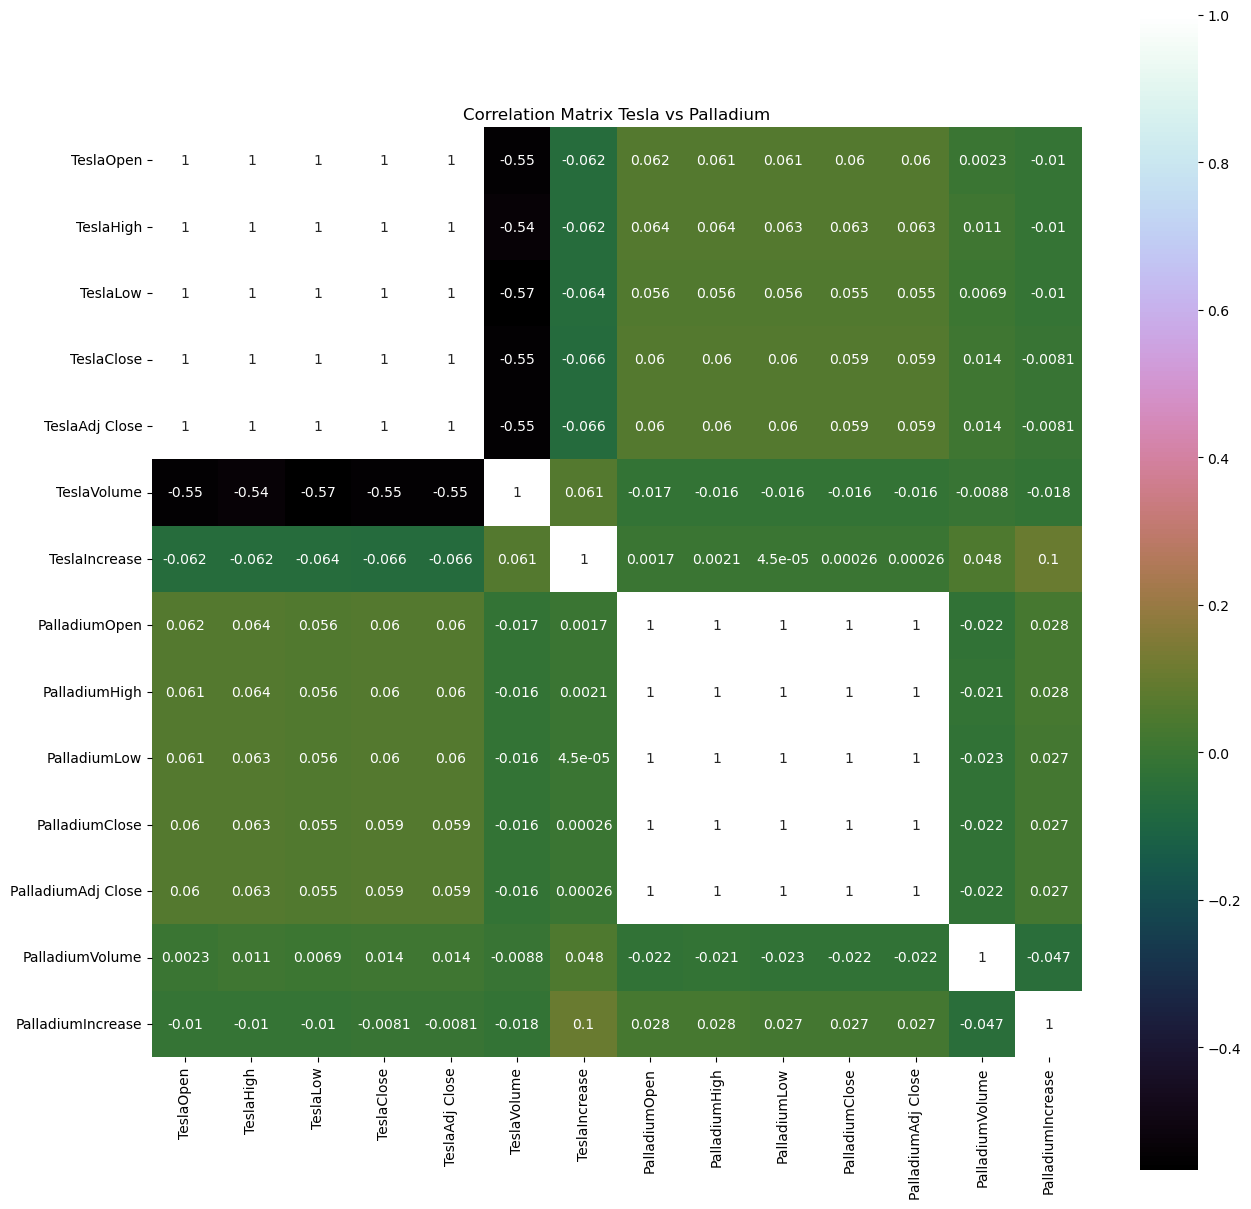

In [28]:
correlation_tsla_pal = pd.concat([tsla, pal], axis = 1).corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix Tesla vs Palladium')
sns.heatmap(correlation_tsla_pal, vmax=1, square=True,annot=True,cmap='cubehelix')

<Axes: title={'center': 'Correlation Matrix Ford vs Oil'}>

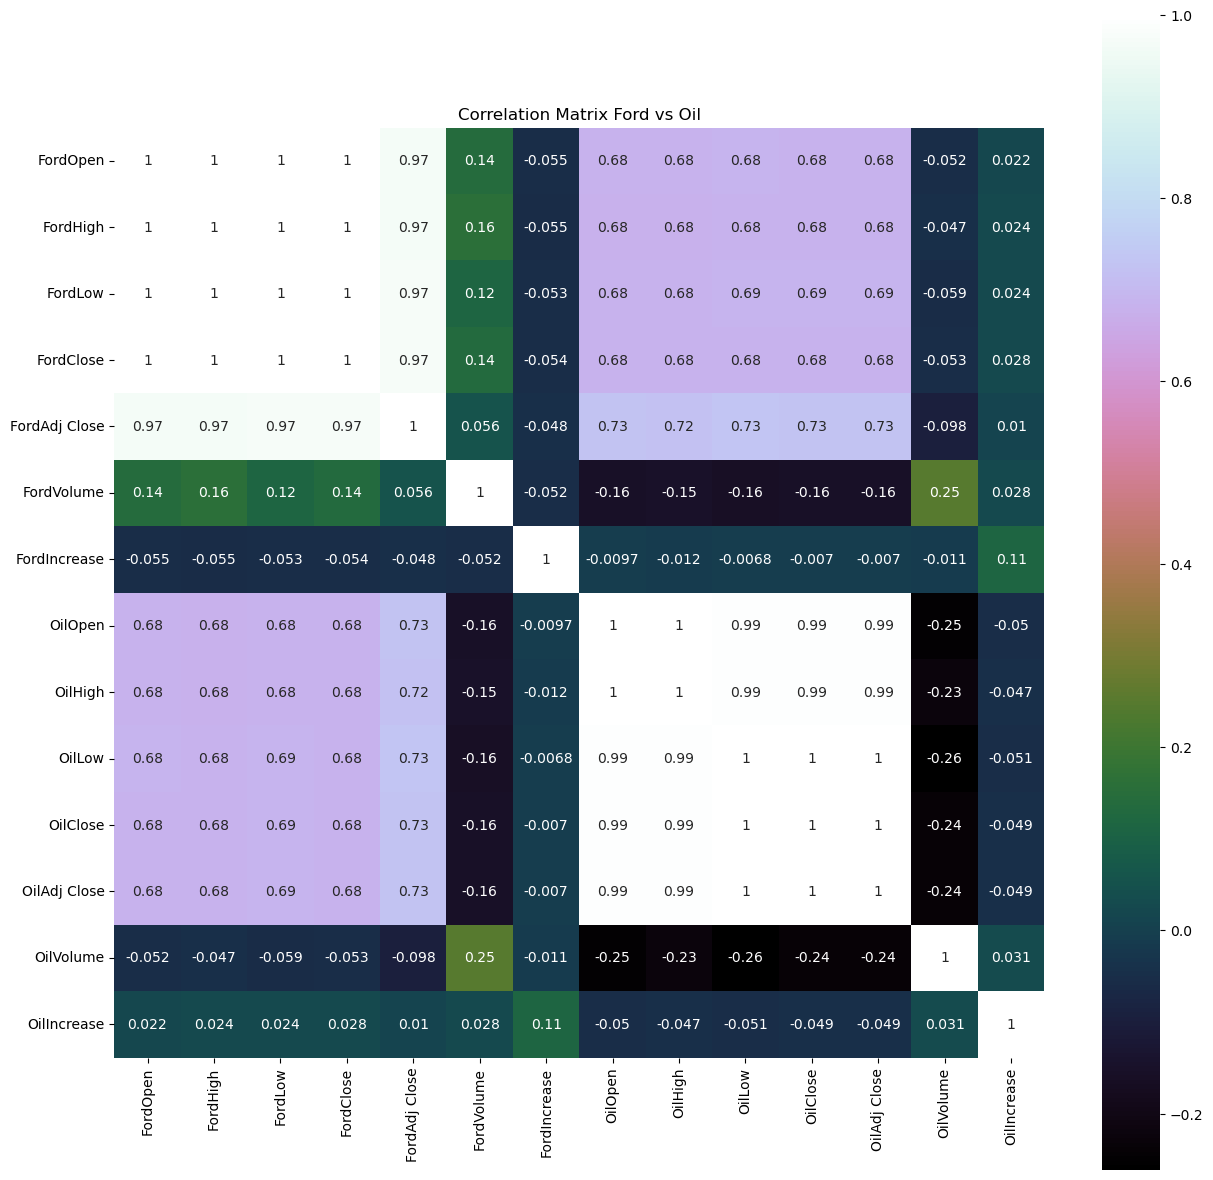

In [29]:
correlation_ford_oil = pd.concat([ford, oil], axis = 1).corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix Ford vs Oil')
sns.heatmap(correlation_ford_oil, vmax=1, square=True,annot=True,cmap='cubehelix')